In [1]:
from ML.EFPs.data_loaders import load_data_qg_tagging
from sklearn.ensemble import RandomForestClassifier
import joblib
import utilities.utilities as utilities

#### Loading the Dataset

In [2]:
root_data_folder = "../../../Data"
X_train, y_train = load_data_qg_tagging(
    quark_data_path=f"{root_data_folder}/Trainning/q_jets_efps_d5_primed.npy", 
    gluon_data_path=f"{root_data_folder}/Trainning/g_jets_efps_d5_primed.npy"
)
X_val, y_val = load_data_qg_tagging(
    quark_data_path=f"{root_data_folder}/Validation/q_jets_efps_d5_primed.npy", 
    gluon_data_path=f"{root_data_folder}/Validation/g_jets_efps_d5_primed.npy"
) 
best_features_set = [0, 1, 5, 6, 12, 17, 33, 42, 43, 48]

#### Creating the Random Forest

In [12]:
random_forest = RandomForestClassifier(max_depth=10, min_samples_split=250, oob_score=True)
# trainning using only the best feature set
random_forest.fit(X_train[:, best_features_set], y_train)
print(f"Oob_score: {random_forest.oob_score_}")

Oob_score: 0.7894414410113813


#### Some quick checks

In [13]:
y_val_predict = random_forest.predict(X_val[:, best_features_set])
utilities.display_metrics(y_val, y_val_predict)

Recall: 0.7521
Precision: 0.8009
Confusion Matrix:
[[18532  4068]
 [ 5394 16368]]


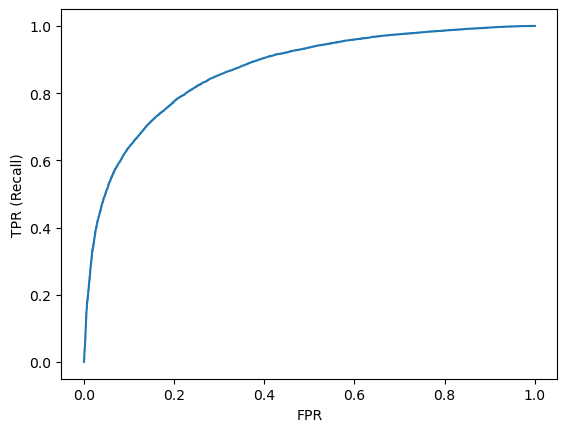

AUC: 0.8683


In [19]:
# roc curve on the validation set
y_score = random_forest.predict_proba(X_val[:, best_features_set])
utilities.display_roc_curve(y_val, y_score[:, 1])

#### Saving the model

In [17]:
with open("QuarkGluon_Tagging_RandomForest.joblib", "wb") as fo:
    joblib.dump(random_forest, fo)